# **Submission Proyek Time Series**
**Nama:** Mohammad Fathur Rozi

**Domisili:** Malang, Jawa Timur

**gmail:** fathurrozi.2833@gmail.com

# Import Package

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Membaca Dataset

In [3]:
data = pd.read_csv("C:\\Users\\LOQ\\OneDrive\\Documents\\Dicoding\\Time Series Price Vegetables and Fruits\\kalimati_tarkari_dataset.csv")
data

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0


# Eksploratori Data

In [4]:
data.isna().sum()

SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [5]:
# Membuat kolom date ke bentuk datetime
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# Mengecek nilai unik yang ada di kolom comodities
unik = data['Commodity'].value_counts()
unik

Commodity
Ginger                  2751
Cauli Local             2750
Cabbage(Local)          2749
Chilli Dry              2748
Raddish White(Local)    2747
                        ... 
Maize                     24
Mango(Calcutte)           23
Sweet Lime                14
Musk Melon                10
Mango(Chousa)              2
Name: count, Length: 132, dtype: int64

Terdapat 132 data unik didalam kolom Commodity, data seperti ini ketika di plot ke multivariat akan sangat bertindihan dengan data yang lain.

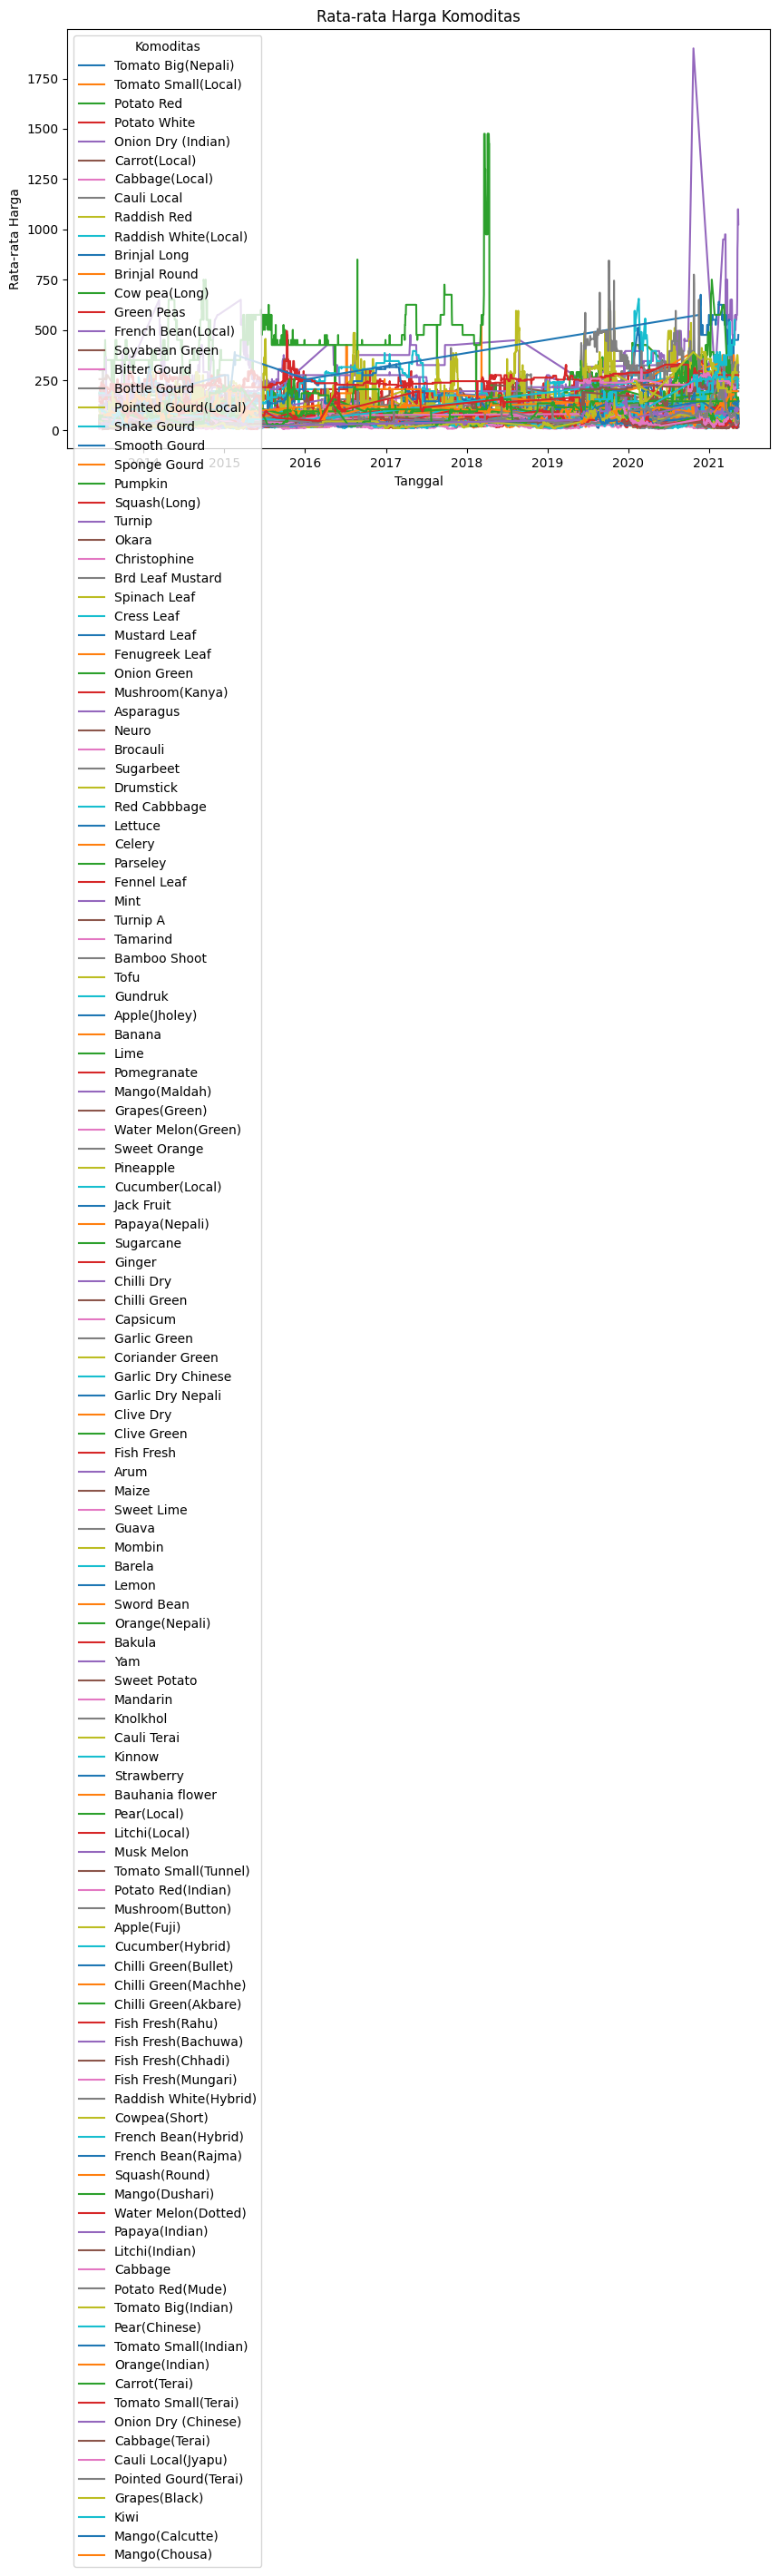

In [7]:
# Mari kita buat plot data nya
plt.figure(figsize=(10,6))

for comodities in data['Commodity'].unique():
    subset= data[data['Commodity']== comodities]
    plt.plot(subset['Date'], subset['Average'], label=comodities)

# Tambahkan judul dan label
plt.title('Rata-rata Harga Komoditas')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Harga')

# Tampilkan legend
plt.legend(title='Komoditas')

Dapat dilihat bahwa dari keseluruhan data saling tumpang tindih sehingga tidak bisa melihat hasil plot secara jelas

# Data Cleansing

In [8]:
# Melihat komoditas yang jumlah count nya diatas 2745
valid_komoditas = unik[unik >= 2748].index
valid_komoditas

Index(['Ginger', 'Cauli Local', 'Cabbage(Local)', 'Chilli Dry'], dtype='object', name='Commodity')

In [9]:
# Filter dataset berdasarkan nilai-nilai unik yang dipilih
data_clean = data[data['Commodity'].isin(valid_komoditas)]

# Hapus kolom yang tidak digunakan
data_clean = data_clean.drop(columns=['SN', 'Unit', 'Minimum', 'Maximum'])

# Cek data yang telah dibersihkan
data_clean

,Commodity,Date,Average
6,Cabbage(Local),2013-06-16,8.0
7,Cauli Local,2013-06-16,32.5
63,Ginger,2013-06-16,145.0
64,Chilli Dry,2013-06-16,175.0
80,Cabbage(Local),2013-06-17,8.0
...,...,...,...
197056,Chilli Dry,2021-05-12,325.0
197079,Cabbage(Local),2021-05-13,22.5
197080,Cauli Local,2021-05-13,37.5
197146,Ginger,2021-05-13,85.0


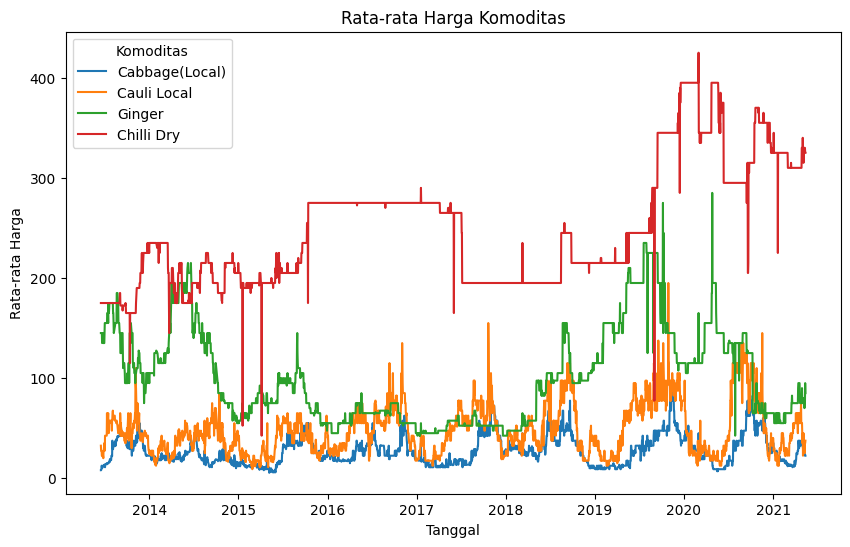

In [10]:
# Mari kita buat plot data nya
plt.figure(figsize=(10,6))

for comodities in data_clean['Commodity'].unique():
    subset= data_clean[data_clean['Commodity']== comodities]
    plt.plot(subset['Date'], subset['Average'], label=comodities)

# Tambahkan judul dan label
plt.title('Rata-rata Harga Komoditas')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Harga')

# Tampilkan legend
plt.legend(title='Komoditas')

Pada komoditas Cauli Local dan Cabbage (Local) terdapat data yang bersifat seasonal atau musiman jika dilihat dari grafik yang sudah di plot, sedangkan untuk lainnya bersifat non stationer

In [11]:
# Mengambil 1 komoditas yang akan dilakukan pemodelan
# Melihat komoditas yang jumlah count nya diatas 2745
komoditas_model = data_clean[data_clean['Commodity'] == 'Cauli Local']


# Filter dataset berdasarkan nilai-nilai unik yang dipilih
data_model = komoditas_model.drop(columns='Commodity')
data_model.reset_index(drop=True, inplace=True)

# Hapus kolom yang tidak digunakan
data_model

,Date,Average
0,2013-06-16,32.5
1,2013-06-17,27.5
2,2013-06-18,27.5
3,2013-06-19,27.5
4,2013-06-20,22.5
...,...,...
2745,2021-05-09,25.0
2746,2021-05-10,25.0
2747,2021-05-11,35.0
2748,2021-05-12,35.0


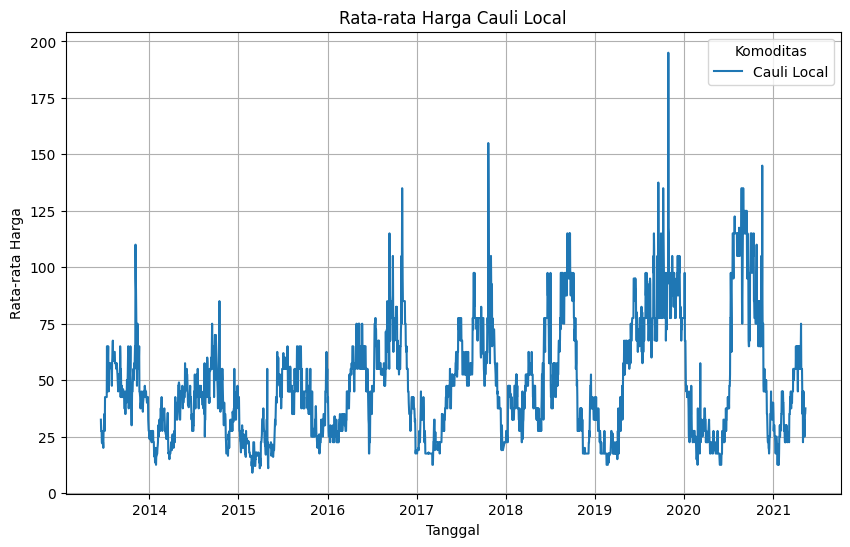

In [12]:
# Plot data 'kentang'
plt.figure(figsize=(10, 6))
plt.plot(data_model['Date'], data_model['Average'], linestyle='-', label='Cauli Local')
plt.title('Rata-rata Harga Cauli Local')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Harga')
plt.legend(title='Komoditas')
plt.grid(True)
plt.show()

# Data Modelling

In [13]:
dates = data_model['Date'].values
Cauli = data_model['Average'].values

In [14]:
# Menentukan ukuran training dan validation set
split_time = int(len(Cauli) * 0.8)  # 80% untuk training, 20% untuk validation
train_series = Cauli[:split_time]
val_series = Cauli[split_time:]

In [15]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    data_model = tf.data.Dataset.from_tensor_slices(series)
    data_model = data_model.window(window_size + 1, shift=1, drop_remainder=True)
    data_model = data_model.flat_map(lambda w: w.batch(window_size + 1))
    data_model = data_model.shuffle(shuffle_buffer)
    data_model = data_model.map(lambda w: (w[:-1], w[-1:]))
    return data_model.batch(batch_size).prefetch(1)

In [56]:
train_set = windowed_dataset(train_series, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(val_series, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Tambahkan dropout untuk regularisasi
    tf.keras.layers.Dense(1)
])


In [57]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<=4.3):
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

callback = myCallback()

In [64]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-05, momentum=1.0)
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100, callbacks=[callback], validation_data=val_set)

Epoch 1/100
     22/Unknown 3s 46ms/step - loss: 17.0137 - mae: 17.0137

c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 17.1162 - mae: 17.1162 - val_loss: 26.1742 - val_mae: 26.1742
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 17.2320 - mae: 17.2320 - val_loss: 26.1739 - val_mae: 26.1739
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 17.2010 - mae: 17.2010 - val_loss: 26.1721 - val_mae: 26.1721
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 17.0866 - mae: 17.0866 - val_loss: 26.2055 - val_mae: 26.2055
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 16.5592 - mae: 16.5592 - val_loss: 26.2502 - val_mae: 26.2502
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 16.5893 - mae: 16.5893 - val_loss: 26.3421 - val_mae: 26.3421
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 16.6138 - mae: 16.6138 - val_loss: 26.4357 - val_mae: 26.4357
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 17.0595 - mae: 17.0595 - val_loss: 26.5906 - val_mae: 26.5906
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━

In [65]:
val_loss, val_mae = model.evaluate(val_set)
print(f"Test Loss: {val_loss}")
print(f"Test MAE: {val_mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.8254 - mae: 8.8254
Test Loss: 8.551495552062988
Test MAE: 8.551495552062988


In [66]:
threshold_mae = (data_model['Average'].max() - data_model['Average'].min()) * 10/100

In [67]:
if val_mae < threshold_mae:
    print("Model memenuhi kriteria MAE < 10% dari skala data.")
else:
    print("Model tidak memenuhi kriteria MAE < 10% dari skala data.")

Model memenuhi kriteria MAE < 10% dari skala data.
